### Customer Churn Dataset
**Fitur-fitur yang tersedia di dataset ini meliputi:**
1. RowNumber: Nomor baris
2. CustomerId: ID pelanggan
3. Surname: Nama belakang pelanggan
4. CreditScore: Skor kredit pelanggan
5. Geography: Negara asal pelanggan
6. Gender: Jenis kelamin pelanggan
7. Age: Umur pelanggan
8. Tenure: Lamanya pelanggan menjadi nasabah bank
9. Balance: Saldo rekening pelanggan
10. NumOfProducts: Jumlah produk yang dimiliki pelanggan di bank
11. HasCrCard: Apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak)
12. IsActiveMember: Apakah pelanggan aktif (1 = Ya, 0 = Tidak)
13. EstimatedSalary: Gaji estimasi pelanggan
14. Exited: Apakah pelanggan churn (1 = Ya, 0 = Tidak)

#### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, classification_report, make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Baca dataset

In [2]:
df = pd.read_csv(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Dataset/Churn_Modelling.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#### Cek nilai yang hilang dan duplikat

In [8]:
cek_mv = df.isna().sum()
cek_duplikat = df.duplicated().sum()
print(f'Check Missing Value\n{cek_mv}\nCheck Duplicated: {cek_duplikat}')
display(df.sample(5))

Check Missing Value
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Check Duplicated: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3003,3004,15801658,Summers,580,France,Male,55,6,104305.74,1,0,1,175750.21,0
1416,1417,15667651,Young,585,Spain,Female,33,8,0.00,2,1,0,114182.07,0
1531,1532,15715031,Davidson,600,France,Female,28,6,0.00,2,0,1,52193.23,0
8022,8023,15665180,Vasiliev,616,France,Female,31,3,136789.14,1,1,0,59346.40,1
9785,9786,15609187,Cox,455,France,Female,27,5,155879.09,2,0,0,70774.97,0


#### Hapus kolom yang tidak digunakan

In [9]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


#### Lakukan transformasi fitur kategorik ke numerik

In [10]:
#Making encoder for each categorical column
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True, dtype='int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [11]:
df.drop(['Geography_Spain'], axis=1, inplace=True)

#### Ubah nama column agar mudah untuk dipanggil

In [12]:
# Rename the 'OldName' column to 'NewName'
df.rename(columns={'Geography_Germany': 'Geography', 'Gender_Male':'Gender'}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Geography        10000 non-null  int32  
 10  Gender           10000 non-null  int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB
None


### Univariate Analysis

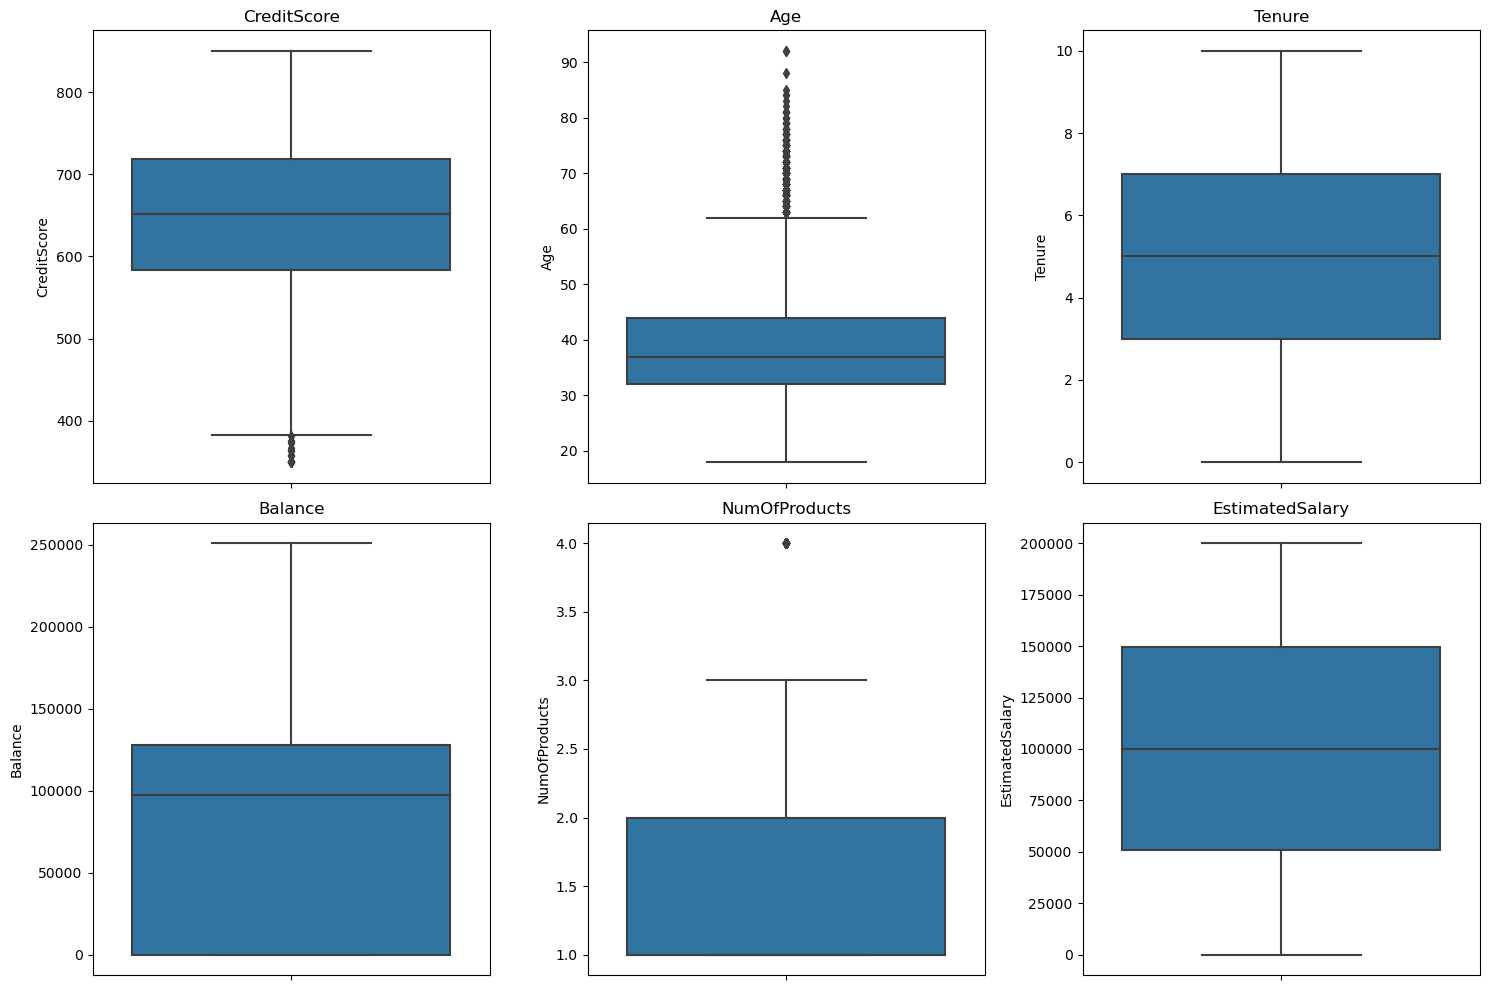

In [8]:
#Melakukan pengencekan outlier menggunakan boxplot
features2analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features2analyze, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

### Multivariate Analysis

#### Heatmap analysis

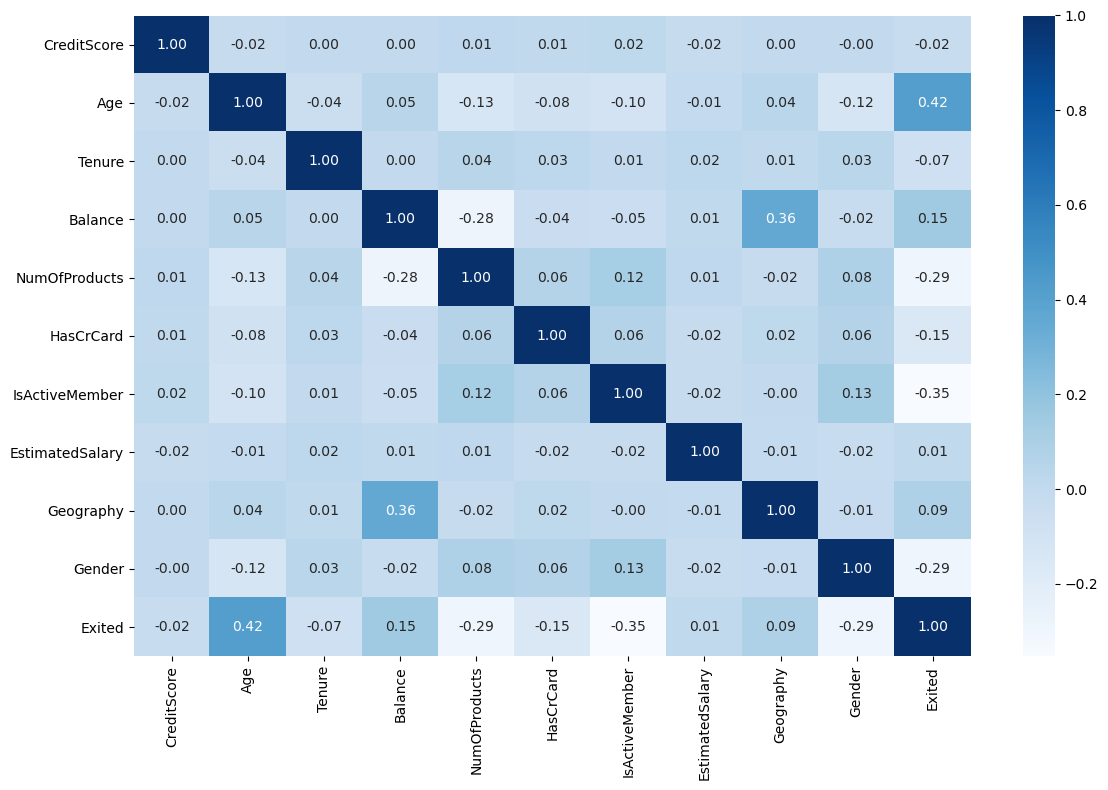

In [94]:
#Melihat korelasi antar fitur dan juga antar label target menggunakan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
#plt.savefig('Heatmap After Encoded.png')
plt.tight_layout()
plt.show()

**Pada visualisasi diatas, tidak ada fitur yang memiliki korelasi tinggi atau fitur yang redundan**

<Figure size 1000x1000 with 0 Axes>

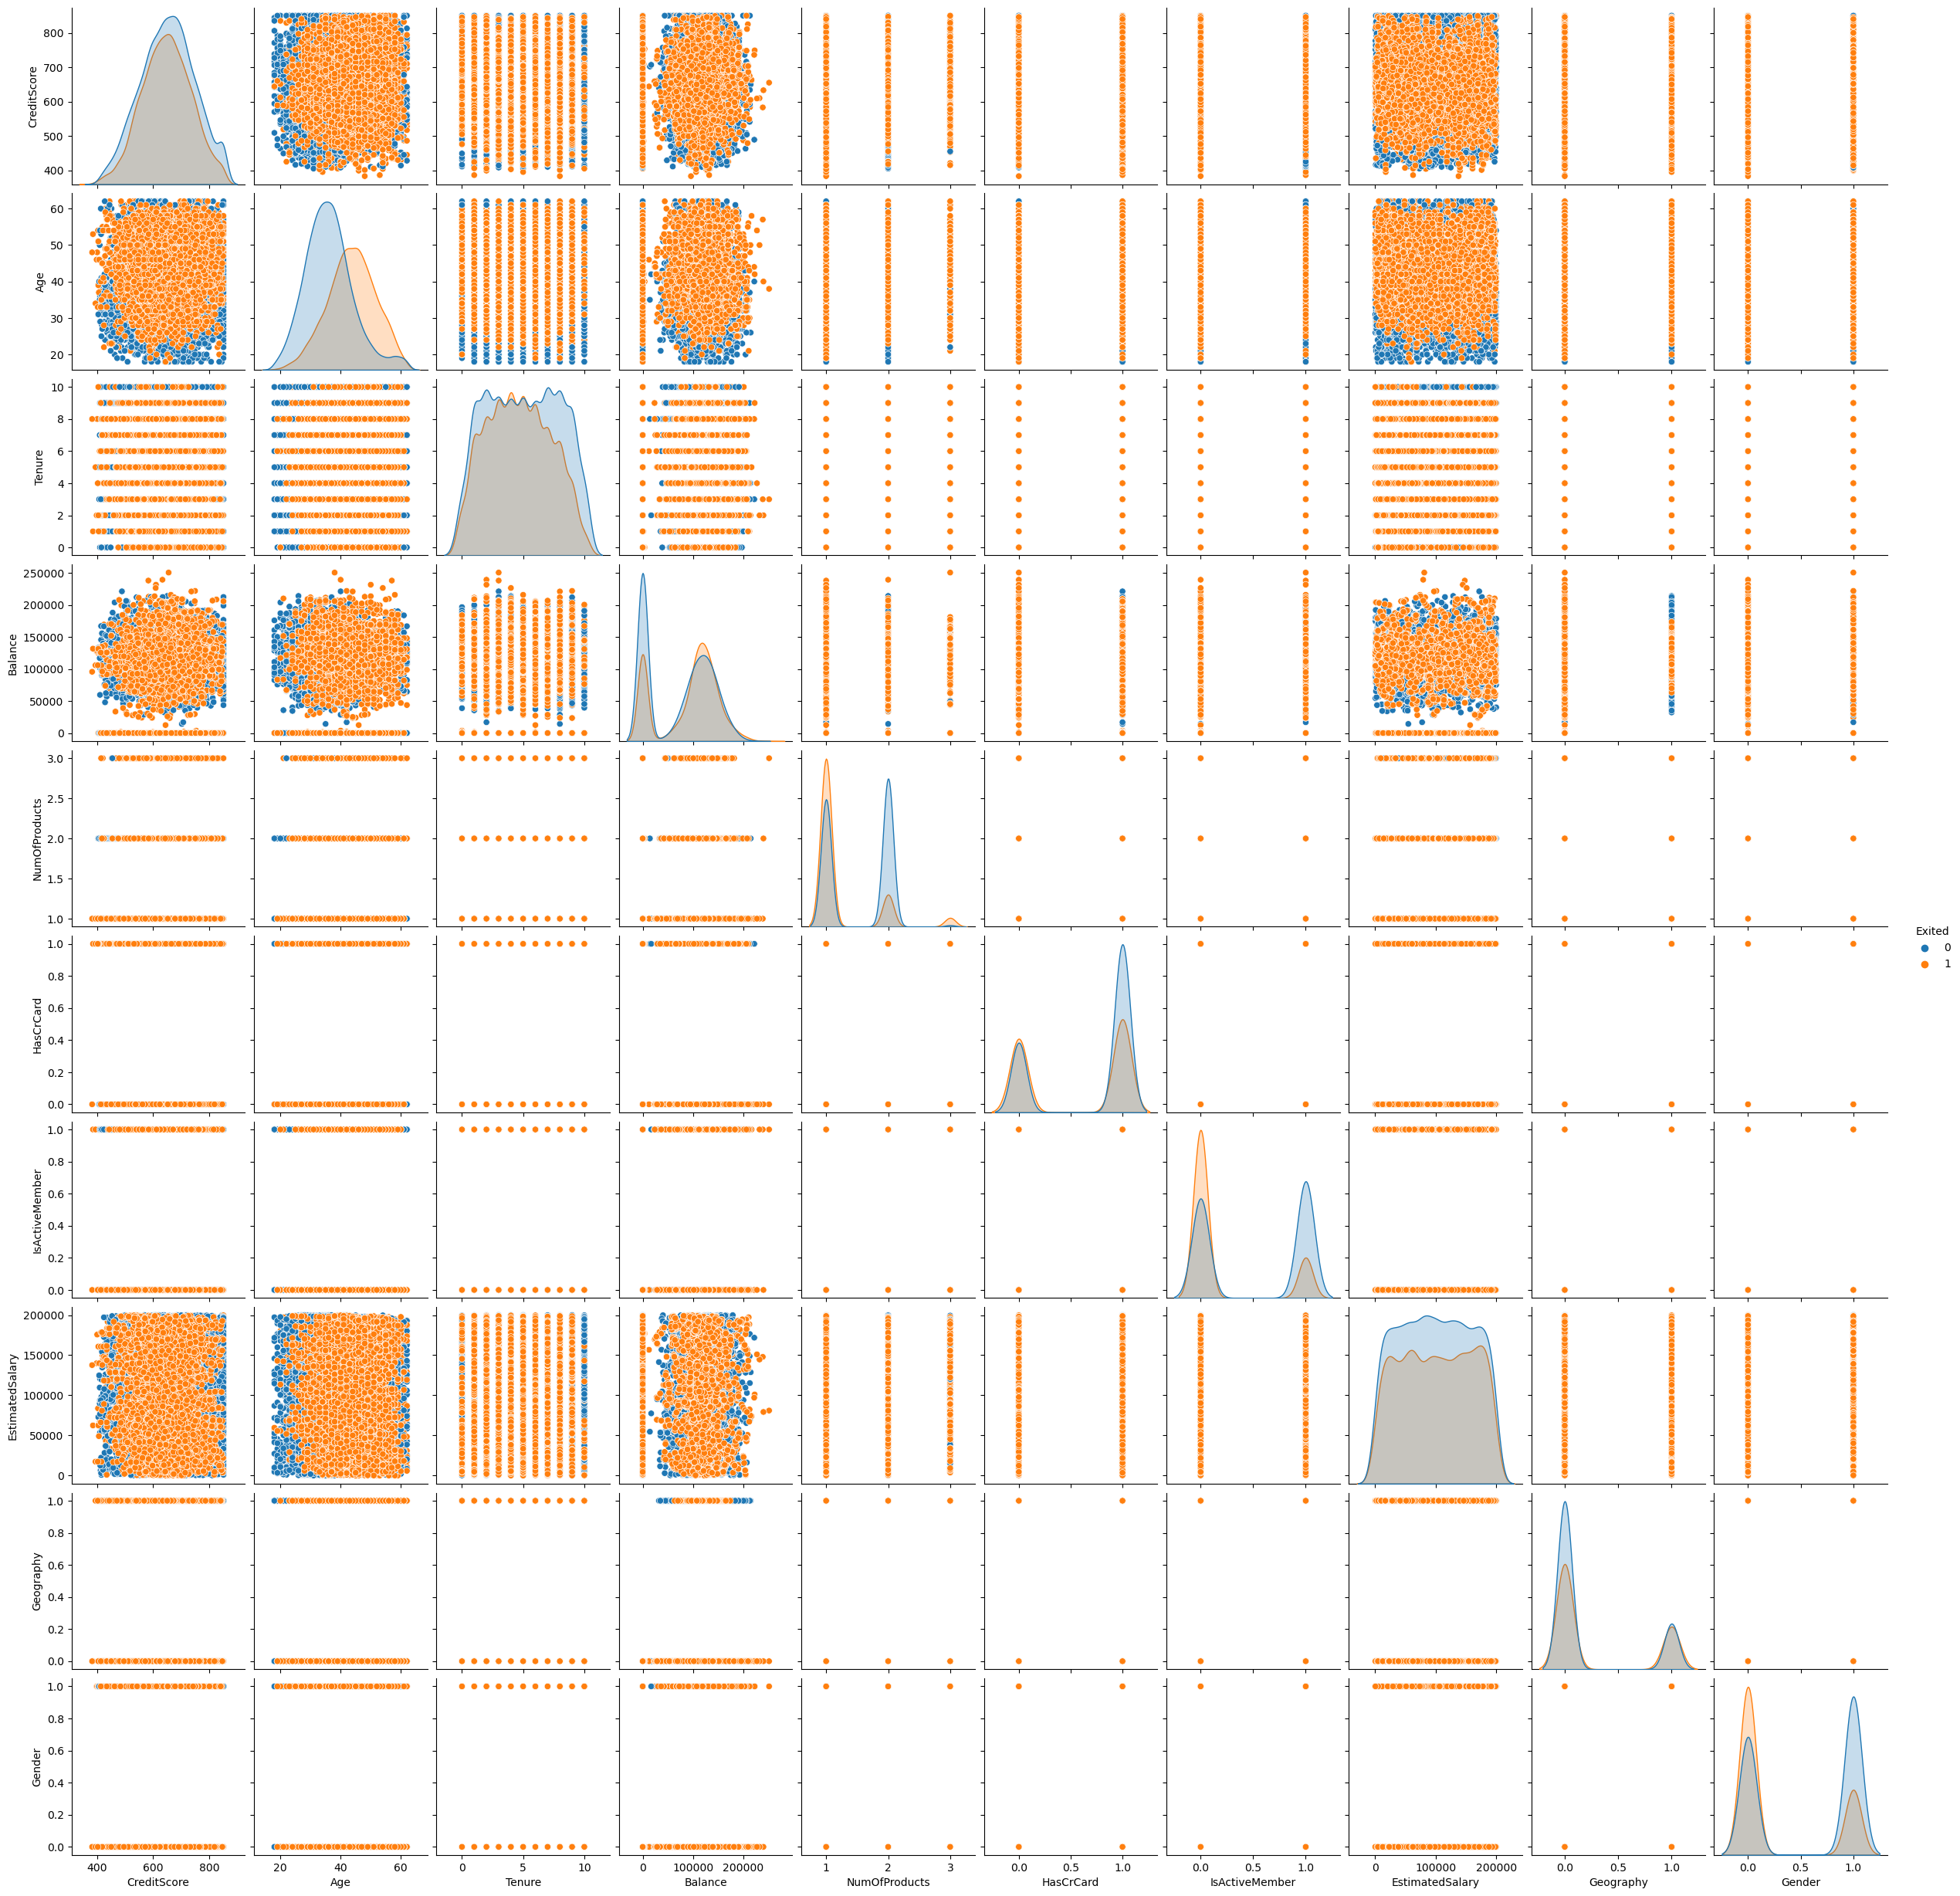

In [93]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind='kde', hue='Exited')
plt.show()

### Handle Class Imbalance

In [13]:
#Cek label target
print('Angka 0 bermakna tidak churn\nAngka 1 bermakna churn\n',df['Exited'].value_counts())

Angka 0 bermakna tidak churn
Angka 1 bermakna churn
 0    7963
1    2037
Name: Exited, dtype: int64


In [14]:
from imblearn import under_sampling, over_sampling
#Making different variabel for oversampling
X_imb = df[[col for col in df.columns if col not in['Exited']]].values
y_imb = df['Exited'].values
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.8).fit_resample(X_imb,y_imb)
print('Berikut nilai hasil dari oversampling:\n', pd.Series(y_over_SMOTE).value_counts())

over_data = pd.DataFrame(X_over_SMOTE, columns=df.drop('Exited', axis=1).columns)
over_data['Exited'] = y_over_SMOTE

df = over_data
display(df.sample(5))

Berikut nilai hasil dari oversampling:
 0    7963
1    6370
dtype: int64


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exited
7897,603.000000,30.00000,6.000000,129548.50,2.000000,1.0,1.0,19282.850000,0.0,1.000000,0
8570,755.000000,28.00000,7.000000,124540.28,1.000000,0.0,1.0,188850.890000,0.0,0.000000,0
10223,572.133568,64.76842,8.596052,0.00,1.798026,1.0,0.0,110288.680352,0.0,0.798026,1
3497,456.000000,63.00000,1.000000,165350.61,2.000000,0.0,0.0,140758.070000,0.0,0.000000,1
8924,516.000000,46.00000,2.000000,0.00,2.000000,1.0,1.0,169122.540000,0.0,1.000000,0


In [15]:
# Convert the column from float to int
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender', 'Exited']] = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender', 'Exited']].astype(int)

# Cek perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14333 entries, 0 to 14332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CreditScore      14333 non-null  int32
 1   Age              14333 non-null  int32
 2   Tenure           14333 non-null  int32
 3   Balance          14333 non-null  int32
 4   NumOfProducts    14333 non-null  int32
 5   HasCrCard        14333 non-null  int32
 6   IsActiveMember   14333 non-null  int32
 7   EstimatedSalary  14333 non-null  int32
 8   Geography        14333 non-null  int32
 9   Gender           14333 non-null  int32
 10  Exited           14333 non-null  int32
dtypes: int32(11)
memory usage: 616.0 KB


### Split Data Train & Test

In [16]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14333, 10)
(11466, 10)
(11466,)
(2867, 10)
(2867,)


In [18]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
2698,586,28,5,0,3,1,0,170487,0,0
11388,568,49,6,88451,2,0,0,30117,0,0
7781,705,34,7,117715,1,1,0,2498,0,1
408,668,37,10,152958,2,1,1,159585,1,1
6926,660,34,1,0,2,1,0,9692,0,1


In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])
  # scaler.to_pickle(filename)

In [57]:
display('Ini merupakan kolom train yang sudah direscaling:', X_train.head())
display('Ini merupakan kolom test yang sudah direscaling:', X_test.head())

'Ini merupakan kolom train yang sudah direscaling:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
2698,0.472,0.135135,0.5,0.000000,0.666667,1.0,0.0,0.852461,0.0,0.0
11388,0.512,0.540541,0.8,0.470618,0.000000,0.0,0.0,0.301979,0.0,0.0
7781,0.710,0.216216,0.7,0.469175,0.000000,1.0,0.0,0.012436,0.0,1.0
408,0.636,0.256757,1.0,0.609642,0.333333,1.0,1.0,0.797946,1.0,1.0
6926,0.620,0.216216,0.1,0.000000,0.333333,1.0,0.0,0.048410,0.0,1.0


'Ini merupakan kolom test yang sudah direscaling:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
168,0.634,0.283784,0.2,0.000000,0.333333,1.0,0.0,0.203569,0.0,0.0
2201,0.500,0.229730,0.4,0.572918,0.333333,1.0,0.0,0.520374,0.0,1.0
8161,0.476,0.175676,0.4,0.397002,0.333333,0.0,1.0,0.179347,0.0,1.0
9535,1.000,0.310811,0.8,0.529450,0.000000,1.0,1.0,0.876763,0.0,1.0
6020,0.518,0.229730,0.2,0.589483,0.000000,1.0,0.0,0.700012,0.0,0.0


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    
    # Buat objek skor F1
    f1_scorer = make_scorer(f1_score)
    score = cross_validate(model, X_train, y_train, cv=5, scoring=f1_scorer, return_train_score=True)
    print('F1-Score (crossval train): '+ str(score['train_score'].mean()))
    print('F1-Score (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances = feat_importances.nlargest(25)  # Ambil 25 fitur teratas
    total_importance = feat_importances.sum()
    feat_importances_percentage = (feat_importances / total_importance) * 100  # Hitung persentasenya

    # Buat bar plot dengan informasi persentase
    fig, ax = plt.subplots(figsize=(10, 8))
    feat_importances_percentage.plot(kind='barh', ax=ax)
    ax.invert_yaxis()

    plt.xlabel('Percentage Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance with Percentage')

    # Tambahkan nilai persentase di atas tiap bar
    for i, v in enumerate(feat_importances_percentage):
        ax.text(v, i, f'{v:.2f}%', color='black', va='center')
    #plt.savefig('RandomForest Feature Importance.png')
    plt.show()

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Modeling

### Create Random Forest Model

#### Fit Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.84
Precision (Train Set): 1.00
Precision (Test Set): 0.83
Recall (Train Set): 1.00
Recall (Test Set): 0.81
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.82
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.92
F1-Score (crossval train): 0.9999509623636141
F1-Score (crossval test): 0.8172143292828903


### Model Evaluation

#### Hyperparameter Tuning untuk Model Random Forest

In [22]:
# tuning hyperparameter RandomForest
n_estimators = [int(x) for x in np.linspace(1, 25, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 50, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 50, 15)]
min_samples_leaf = [int(x) for x in np.linspace(2, 100, 15)]
# n_estimators = [300]
# max_depth = [8]
# hyper2 = dict(n_estimators=n_estimators, max_depth=max_depth)
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Buat objek skor F1
f1_scorer = make_scorer(f1_score)

#Inisialisasi randomsearch
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring=f1_scorer, random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

# Mencetak hasil terbaik
print("Parameter terbaik:", rs.best_params_)
print("Skor terbaik (F1 Score):", rs.best_score_)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.82
Precision (Train Set): 0.88
Precision (Test Set): 0.81
Recall (Train Set): 0.84
Recall (Test Set): 0.76
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.78
roc_auc (train-proba): 0.95
roc_auc (test-proba): 0.90
F1-Score (crossval train): 0.8522813746838626
F1-Score (crossval test): 0.7976619854095286
Parameter terbaik: {'n_estimators': 14, 'min_samples_split': 29, 'min_samples_leaf': 2, 'max_depth': 24, 'criterion': 'gini'}
Skor terbaik (F1 Score): 0.7968537782791264


#### Score to dataframe

In [23]:
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)

f1_scorer = make_scorer(f1_score)
score = cross_validate(rs, X_train, y_train, cv=5, scoring=f1_scorer, return_train_score=True)

In [24]:
import pandas as pd

# Simpan semua skor ke dalam sebuah dictionary
model_scores = {
    'Random Forest': [
        f1_score(y_train, y_pred_train),
        f1_score(y_test, y_pred),
        score['train_score'].mean(),
        score['test_score'].mean()
    ],
    'Metric': ['F1-Score (Train)', 'F1-Score (Test)', 'F1-Score (Crossval Train)', 'F1-Score (Crossval Test)']
}

# Buat DataFrame dari dictionary dengan nama model sebagai index
df_scores = pd.DataFrame(model_scores['Random Forest'], index=model_scores['Metric'], columns=['Random Forest'])

# Tampilkan DataFrame
display(df_scores)

,Random Forest
F1-Score (Train),0.855908
F1-Score (Test),0.784553
F1-Score (Crossval Train),0.852281
F1-Score (Crossval Test),0.797662


#### Learning Curve for RFC

param value: 1; train: 1.0; test: 0.917452990180263
param value: 5; train: 0.9730081071325227; test: 0.9107357652812198
param value: 9; train: 0.9499484926489601; test: 0.9043028861210679
param value: 13; train: 0.936739875251202; test: 0.9022729931820841
param value: 17; train: 0.9286086581124336; test: 0.9005248459793915
param value: 21; train: 0.9219566342004313; test: 0.897988897988898
param value: 25; train: 0.9160452662789952; test: 0.8950759496214042
param value: 29; train: 0.9133799597661518; test: 0.8950556223283497
param value: 33; train: 0.909347667528178; test: 0.8931748749930568
param value: 37; train: 0.9063881568376354; test: 0.8917519644792373
param value: 41; train: 0.9040914271047316; test: 0.8902938357483811
param value: 45; train: 0.9014245639560274; test: 0.8887501432955978
param value: 49; train: 0.9018048155049234; test: 0.8904819813910724
param value: 53; train: 0.8980628142350545; test: 0.8871537416991964
param value: 57; train: 0.8968994235085569; test: 0.8866

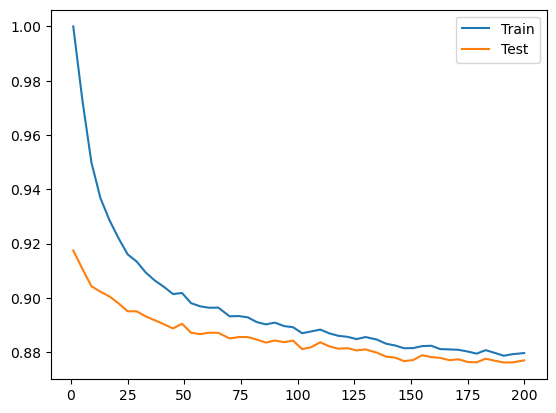

In [30]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_split
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=100, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Feature Importance pada model RFC

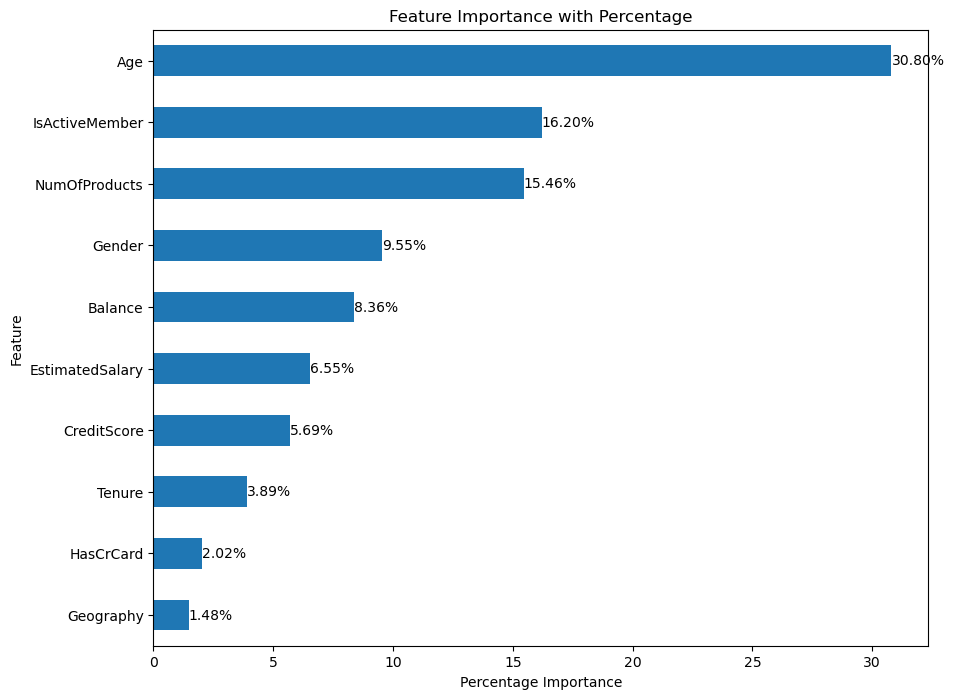

In [26]:
show_feature_importance(rs.best_estimator_)

#### Buat Analisa Confussion Matrix dan Clasification Report

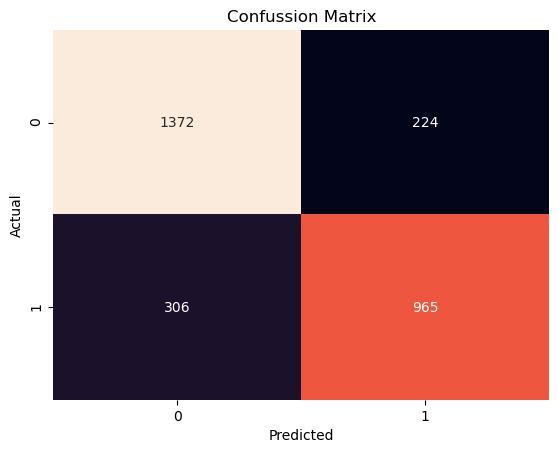

In [27]:
rf_pred = rs.predict(X_test)
cf = confusion_matrix(y_test, rf_pred)

# Visualisasi confusion matrix dengan nilai 0 dan 1 di atas kolom
sns.heatmap(cf, annot=True, fmt='.0f', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.savefig('Confussion Matrix RandomForest Model.png')
plt.show()

In [33]:
# Churn rate after confussion matrix
Total_Customer = 1390 + 287 + 984 + 206
F1_RATE = round(((287 + 206) / Total_Customer) * 100)
print(Total_Customer)
print('Churn rate dari hasil Metrics F1-Score didapatkan sebesar:', F1_RATE,'%')

2867
Churn rate dari hasil Metrics F1-Score didapatkan sebesar: 17 %


In [34]:
rf_pred = rs.predict(X_test)
report = classification_report(y_test, rf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1596
           1       0.81      0.76      0.78      1271

    accuracy                           0.82      2867
   macro avg       0.81      0.81      0.81      2867
weighted avg       0.81      0.82      0.81      2867



In [26]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.84
Precision (Train Set): 0.94
Precision (Test Set): 0.82
Recall (Train Set): 0.92
Recall (Test Set): 0.82
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.82
F1-Score (crossval train): 0.9441091013823801
F1-Score (crossval test): 0.8134193221862691


In [27]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 5, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 15, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num=11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init Model
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring=f1_scorer)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
# Mencetak hasil terbaik
print("Parameter terbaik:", xg_tuned.best_params_)
print("Skor terbaik (F1 Score):", xg_tuned.best_score_)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.84
Precision (Train Set): 0.95
Precision (Test Set): 0.82
Recall (Train Set): 0.95
Recall (Test Set): 0.82
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.82
F1-Score (crossval train): 0.8786420199770898
F1-Score (crossval test): 0.8057186946364749
Parameter terbaik: {'tree_method': 'approx', 'min_child_weight': 5, 'max_depth': 0, 'lambda': 0.1, 'gamma': 0.8, 'eta': 0.595959595959596, 'colsample_bytree': 0.9, 'alpha': 0.30000000000000004}
Skor terbaik (F1 Score): 0.8083828243393887


#### Learning curve for XGBoost

param value: 0; train: 0.9914098779614781; test: 0.9191489009670829
param value: 15; train: 0.9626458848860864; test: 0.9155131518767882
param value: 30; train: 0.951193952677232; test: 0.9145710054800964
param value: 45; train: 0.9372485492586177; test: 0.9056749784022512
param value: 60; train: 0.9317454090916873; test: 0.9036983855165673
param value: 75; train: 0.9247142794877422; test: 0.9019075746348474
param value: 90; train: 0.9199835766268705; test: 0.9007167734440462
param value: 105; train: 0.9150842598343497; test: 0.8988672261399534
param value: 120; train: 0.9099006407978002; test: 0.8966744784926602
param value: 135; train: 0.9070518890727448; test: 0.8969256151074333
param value: 150; train: 0.9047925834603288; test: 0.8969543333179697


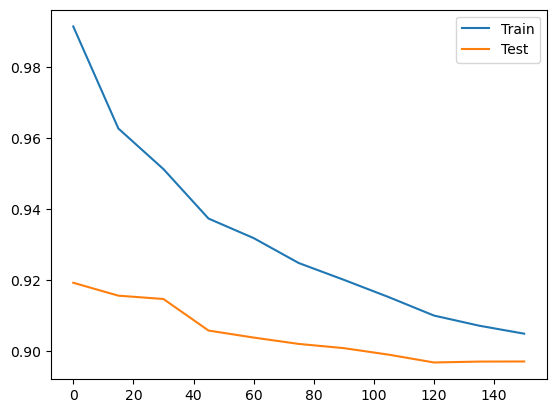

In [74]:
#learning curve
#param_values = [int(x) for x in np.linspace(10, 220, 50)] # 'max_depth'
#param_values = [int(x) for x in np.linspace(1, 200, 11)] # 'min_child_weight'
#param_values = [float(x) for x in np.linspace(0, 200, num = 11)] # 'gamma' 

#param_values = [float(x) for x in np.linspace(0, 150, num=11)] # 'colsample_bytree'
#param_values = [float(x) for x in np.linspace(0, 150, num = 11)] # 'eta'

#param_values = [float(x) for x in np.linspace(0, 150, num = 11)] # 'lambda'
param_values = [int(x) for x in np.linspace(0, 150, num = 11)] # 'alpha' 

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(n_estimators = 100, min_child_weight=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Melihat feature importance pada model XGBoost

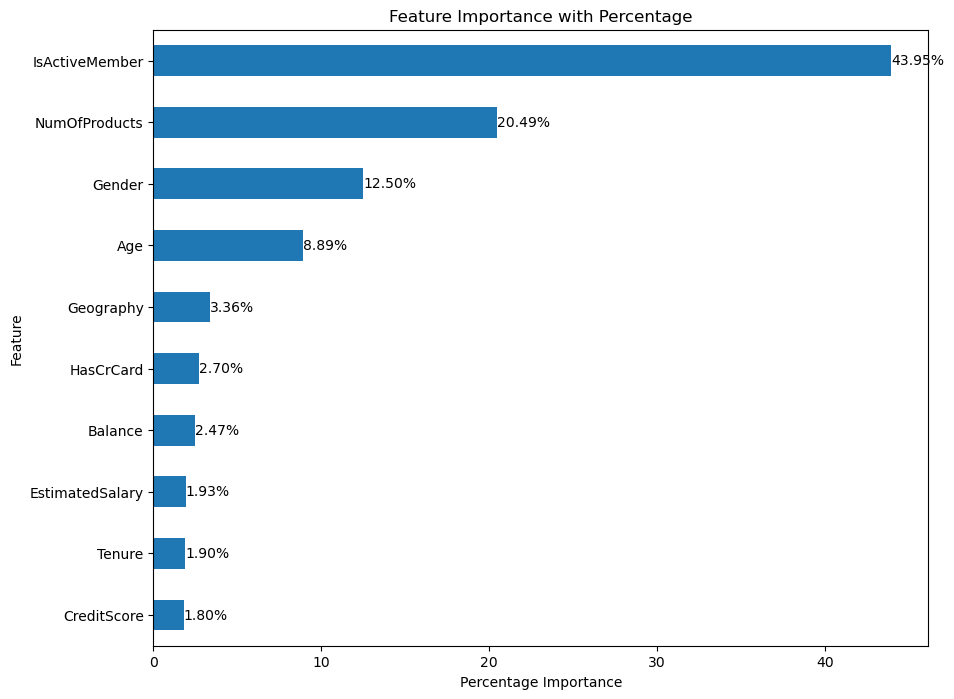

In [28]:
show_feature_importance(xg_tuned.best_estimator_)

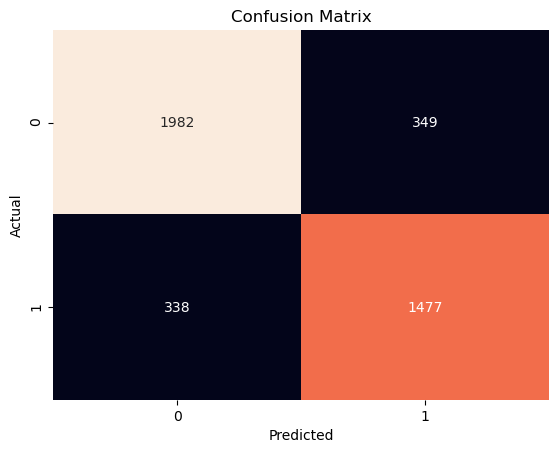

In [89]:
xgb_pred = xg_tuned.predict(X_test)
cf = confusion_matrix(y_test, xgb_pred)
# Visualisasi confusion matrix dengan nilai 0 dan 1 di atas kolom
sns.heatmap(cf, annot=True, fmt='.0f', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CM XGBoost.png')
plt.show()

In [77]:
xgb_pred = xg_tuned.predict(X_test)
report = classification_report(y_test, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2331
           1       0.81      0.81      0.81      1815

    accuracy                           0.83      4146
   macro avg       0.83      0.83      0.83      4146
weighted avg       0.83      0.83      0.83      4146



Dampak dari model yang memprediksi bahwa sejumlah pelanggan tidak akan churn padahal sebenarnya mereka akan churn, biasanya akan merugikan perusahaan bank dalam beberapa cara diantaranya:

1. Kehilangan Pelanggan: Ketika model salah memprediksi bahwa pelanggan tidak akan churn, sementara sebenarnya mereka churn, perusahaan bank akan kehilangan pelanggan yang seharusnya bisa mereka pertahankan. Ini berarti berkurangnya pendapatan dan keuntungan, karena perusahaan harus mencari pelanggan baru untuk menggantikan yang hilang.

2. Hilangnya Pendapatan: Pelanggan yang churn biasanya berarti hilangnya sumber pendapatan. Pelanggan yang tetap setia biasanya memberikan pendapatan rutin bagi perusahaan bank melalui biaya-biaya perbankan, bunga, atau produk-produk keuangan lainnya. Ketika model gagal mengidentifikasi pelanggan yang akan churn, perusahaan kehilangan sumber pendapatan ini.

3. Biaya Akuisisi Pelanggan Baru: Untuk menggantikan pelanggan yang churn, perusahaan bank harus menghabiskan sumber daya untuk menarik pelanggan baru. Ini melibatkan biaya akuisisi pelanggan, seperti promosi, iklan, dan insentif untuk menarik pelanggan baru. Biaya ini bisa cukup besar, dan kesalahan dalam memprediksi churn dapat meningkatkannya.

4. Dampak Reputasi: Kesalahan dalam memprediksi churn dapat merusak reputasi perusahaan bank. Pelanggan yang merasa tidak dipahami atau diperlakukan secara tidak adil oleh bank mereka mungkin akan kehilangan kepercayaan dan beralih ke bank lain. Ini dapat mengurangi citra positif perusahaan dan mengurangi kepercayaan pelanggan terhadap bank tersebut.

Dampak dari model yang memprediksi bahwa sejumlah pelanggan akan churn padahal sebenarnya mereka tidak akan churn bisa mencakup:

1. Kehilangan Kepercayaan Pelanggan: Ketika model salah memprediksi bahwa pelanggan akan churn padahal sebenarnya mereka tidak akan churn, dapat menyebabkan kehilangan kepercayaan pelanggan terhadap bank. Pelanggan yang diberi tahu bahwa mereka akan churn padahal sebenarnya tidak, mungkin akan merasa tidak dipahami dan bahkan mungkin mencari bank lain yang lebih akurat dalam prediksi.

2. Biaya Rendah: Model yang menghasilkan banyak false positives (kasus di mana pelanggan diprediksi akan churn, tetapi sebenarnya tidak) dapat menyebabkan biaya yang tidak perlu. Bank mungkin menghabiskan sumber daya untuk mencoba mempertahankan pelanggan yang sebenarnya tidak memiliki niat untuk churn.

3. Kebingungan dan Ketidakpuasan Pelanggan: Kesalahan prediksi semacam ini dapat menyebabkan kebingungan di antara pelanggan dan meningkatkan ketidakpuasan. Pelanggan yang menerima komunikasi atau tindakan pencegahan yang tidak sesuai dengan situasinya mungkin merasa terganggu atau tidak puas.

4. Penggunaan Sumber Daya yang Tidak Efisien: Bank mungkin mengalokasikan sumber daya dan usaha untuk mengatasi masalah churn yang sebenarnya tidak ada. Hal ini dapat mengalihkan sumber daya yang seharusnya digunakan untuk tujuan lain yang lebih kritis.

Ada beberapa cara untuk mengurangi hal tersebut diantaranya : 
- Mengurangi False Positives (FP):
Jika bank lebih fokus pada menghindari pengeluaran dan sumber daya yang tidak perlu dalam upaya retensi pelanggan, maka mengurangi FP bisa menjadi prioritas. Dalam konteks ini, bank ingin memastikan bahwa mereka hanya mengambil tindakan retensi pada pelanggan yang benar-benar akan churn.Ini bisa menghemat biaya operasional dan sumber daya yang dikeluarkan untuk mempertahankan pelanggan.

- Mengurangi False Negatives (FN):
Jika bank lebih fokus pada mempertahankan pelanggan dan mencegah kehilangan bisnis, maka mengurangi FN bisa menjadi prioritas. Dalam konteks ini, bank ingin memastikan bahwa mereka tidak melewatkan pelanggan yang benar-benar akan churn.
Mengurangi FN dapat membantu bank mengambil tindakan retensi yang lebih dini dan efektif, sehingga menjaga pendapatan dan keuntungan.

Karena saya ingin mengurangi faktor dari kedua hal diatas, saya akan mementingkan nilai akurasi F1-Score dikarenakan F1-Score merupakan metriks pengukuran gabungan untuk mengurangi kedua faktor tersebut.

## Arsip Code 

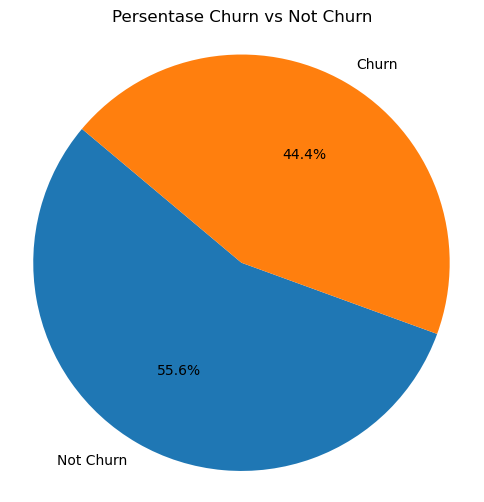

In [35]:
# Mengganti nilai numerik ke kategori
df['Exited'] = df['Exited'].map({0: 'Not Churn', 1: 'Churn'})

# Menghitung persentase
data_count = df['Exited'].value_counts()
labels = data_count.index
sizes = data_count.values

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat lingkaran menjadi proporsional
plt.title('Persentase Churn vs Not Churn')
#plt.savefig('Persentase Churn vs Not Churn after imbalancing')
plt.show()

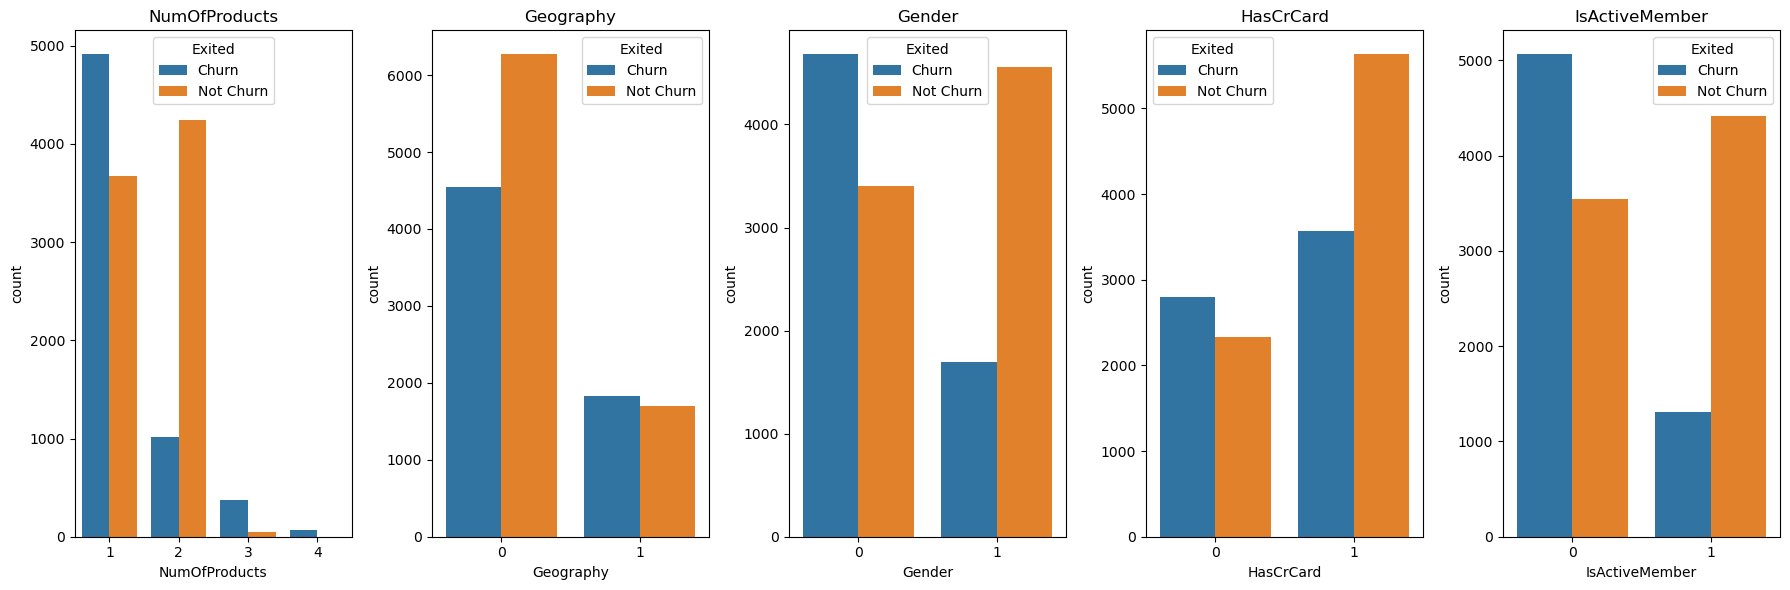

In [36]:
cat = ['NumOfProducts', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(18, 6))

for i, analyze in enumerate(cat):
    plt.subplot(1, 5, i + 1)
    sns.countplot(data=df, x=analyze, hue='Exited')
    plt.title(analyze)

#plt.savefig(f'{analyze} column')
plt.tight_layout()
plt.show()